# **Exploratory data analysis of personal medical costs dataset**

** if you will load Plotly charts without 'svg' or 'png' in brackets (correct way: fig.show()), they will be interactive

## - importing data

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [218]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [219]:
med_costs = pd.read_csv('C:/Users/dasha/Desktop/Medical_Cost_Personal_Datasets.csv')

In [220]:
print('-'*25, 'dataset head', '-'*25)
print(med_costs.head())
print('-'*25, 'dataset tail', '-'*25)
print(med_costs.tail())

------------------------- dataset head -------------------------
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
------------------------- dataset tail -------------------------
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


## - column description

The dataset represents information about personal medical insurance costs.

Columns:
- age: age of primary beneficiary
- sex: gender of the person, female, male
- bmi: body mass index, ideally 18.5 to 24.9
- children: number of children covered by health insurance / number of dependents
- smoker: is person a smoker or not
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: individual medical costs billed by health insurance

## - info about data

In [221]:
med_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [222]:
med_costs.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [223]:
category_col = med_costs.select_dtypes(include = 'object').columns
numeric_col = med_costs.select_dtypes(include = ['int', 'float']).columns

In [224]:
med_costs.shape

(1338, 7)

## - data cleaning

### - check missing values

In [225]:
med_costs.isnull().sum()
# no missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### - check duplicates

In [226]:
duplicates_rows = med_costs[med_costs.duplicated()]
print(duplicates_rows)
# there are no duplicated rows

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


### - dealing with outliers

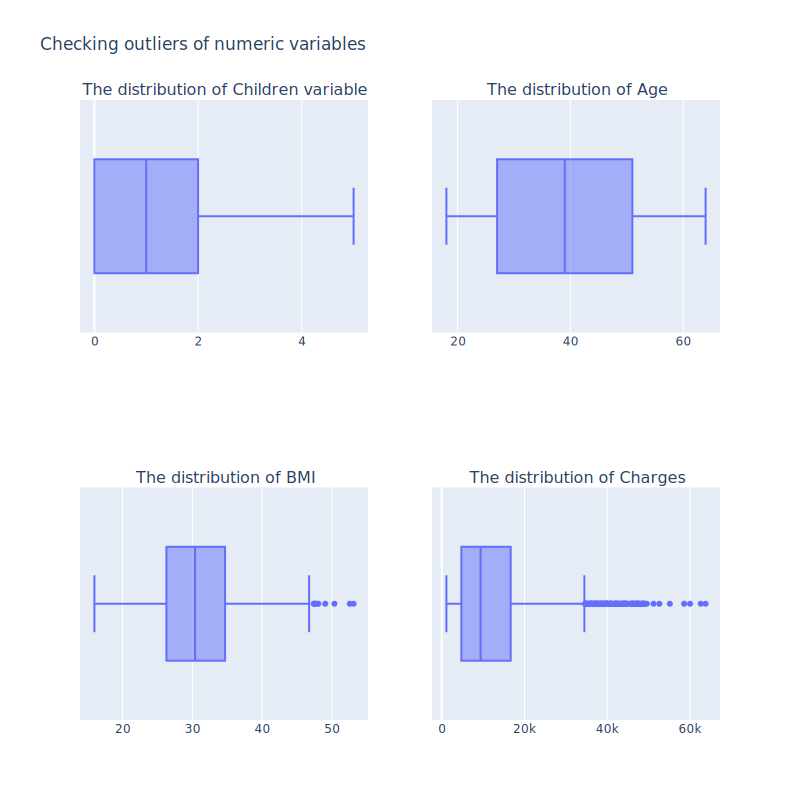

In [227]:
# создание субплотов 2x2
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=("The distribution of Children variable", "The distribution of Age", "The distribution of BMI", "The distribution of Charges"))

# добавление графиков в каждую из позиций
box1 = px.box(med_costs, x='children')
box2 = px.box(med_costs, x='age')
box3 = px.box(med_costs, x='bmi')
box4 = px.box(med_costs, x='charges')

# добавление каждого box plot в соответствующую ячейку
for trace in box1['data']:
    fig.add_trace(trace, row=1, col=1)

for trace in box2['data']:
    fig.add_trace(trace, row=1, col=2)

for trace in box3['data']:
    fig.add_trace(trace, row=2, col=1)

for trace in box4['data']:
    fig.add_trace(trace, row=2, col=2)

# Настройка размера фигуры и отображение
fig.update_layout(height=800, width=800, showlegend=False, title_text="Checking outliers of numeric variables")
fig.show('svg')

- code for dealing with outliers by replacing with median (in this case we do not change outliers)

In [228]:
'''
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)  # 1 квартиль
    Q3 = df[column].quantile(0.75)  # 3 квартиль
    IQR = Q3 - Q1 
    
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    median_value = df[column].median()

    # заменяем выбросы на медиану
    df[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

replace_outliers_with_median(med_costs, 'bmi')
replace_outliers_with_median(med_costs, 'charges')
'''

"\ndef replace_outliers_with_median(df, column):\n    Q1 = df[column].quantile(0.25)  # 1 квартиль\n    Q3 = df[column].quantile(0.75)  # 3 квартиль\n    IQR = Q3 - Q1 \n    \n    lower_bound = Q1 - 1.5 * IQR  \n    upper_bound = Q3 + 1.5 * IQR  \n    median_value = df[column].median()\n\n    # заменяем выбросы на медиану\n    df[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)\n\nreplace_outliers_with_median(med_costs, 'bmi')\nreplace_outliers_with_median(med_costs, 'charges')\n"

## - decriptive statistics

In [229]:
med_costs.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [230]:
med_costs.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### - category variables

- checking value counts in category variables

In [231]:
med_costs['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

- checking distribution of 'sex' variable using Seaborn

Text(0, 0.5, 'Count')

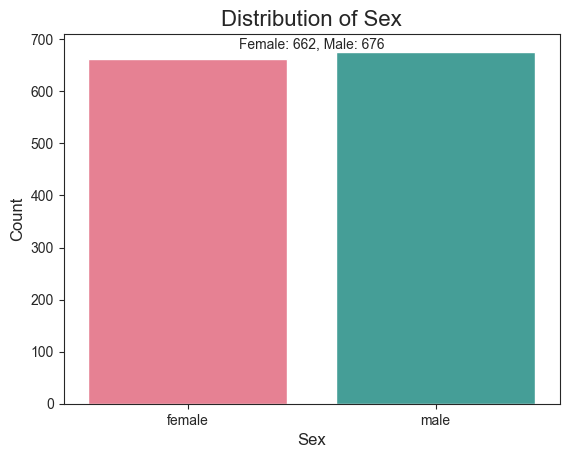

In [232]:
counts = med_costs['sex'].value_counts()
male_count = counts['male']
female_count = counts['female']

sns.set_style("ticks")
plot1 = sns.countplot(x='sex', data=med_costs, palette='husl')
plot1.text(x=0.5, y=max(counts) + 1, 
        s=f'Female: {female_count}, Male: {male_count}', 
        ha='center', va='bottom', fontsize=10);

plt.title('Distribution of Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)

- checking distribution of 'sex' variable using Plotly

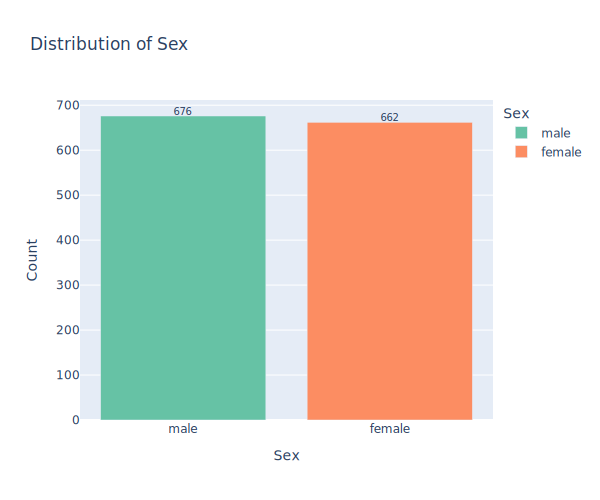

In [233]:
counts = med_costs['sex'].value_counts().reset_index()
counts.columns = ['sex', 'count']

fig = px.bar(counts, x='sex', y='count', 
             title='Distribution of Sex',
             labels={'sex': 'Sex', 'count': 'Count'},
             color='sex', 
             color_discrete_sequence=px.colors.qualitative.Set2,
             width=600, 
             height=500)  

for index, row in counts.iterrows():
    fig.add_annotation(x=row['sex'], 
                       y=row['count'] + 12,  # отступ над столбцом
                       text=str(row['count']),
                       showarrow=False,
                       font=dict(size=10),
                       align='center')
fig.show('svg')

In [234]:
med_costs['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

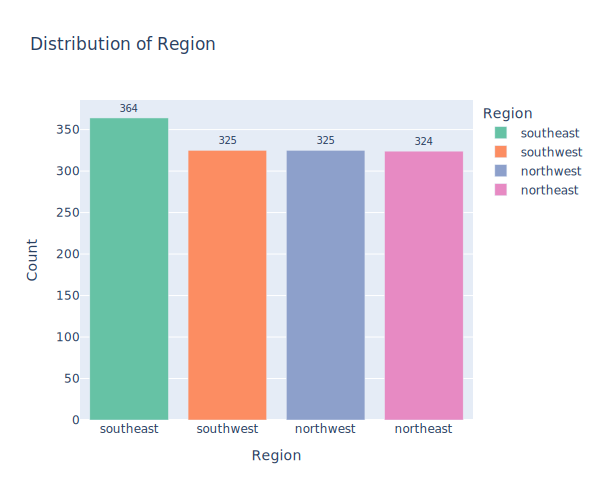

In [235]:
counts = med_costs['region'].value_counts().reset_index()
counts.columns = ['region', 'count']

fig = px.bar(counts, x='region', y='count', 
             title='Distribution of Region',
             labels={'region': 'Region', 'count': 'Count'},
             color='region', 
             color_discrete_sequence=px.colors.qualitative.Set2,
             width=600, 
             height=500)  

for index, row in counts.iterrows():
    fig.add_annotation(x=row['region'], 
                       y=row['count'] + 12,  # отступ над столбцом
                       text=str(row['count']),
                       showarrow=False,
                       font=dict(size=10),
                       align='center')
fig.show('svg')

In [236]:
med_costs['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

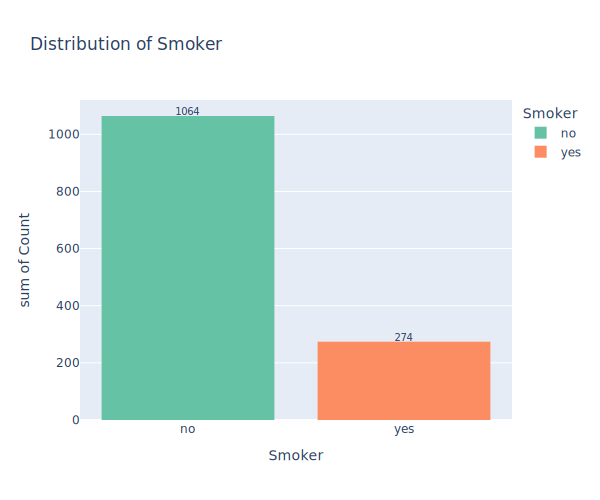

In [237]:
counts = med_costs['smoker'].value_counts().reset_index()
counts.columns = ['smoker', 'count']

fig = px.histogram(counts, x='smoker', y='count', 
             title='Distribution of Smoker',
             labels={'smoker': 'Smoker', 'count': 'Count'},
             color='smoker', 
             color_discrete_sequence=px.colors.qualitative.Set2,
             width=600, 
             height=500)  

for index, row in counts.iterrows():
    fig.add_annotation(x=row['smoker'], 
                       y=row['count'] + 17,  # отступ над столбцом
                       text=str(row['count']),
                       showarrow=False,
                       font=dict(size=10),
                       align='center')
fig.show('svg')

- crosstabs with category variables

In [238]:
# gender distribution by regions (%)
round(pd.crosstab(med_costs.sex, med_costs.region, normalize='columns')*100,2)

region,northeast,northwest,southeast,southwest
sex,,,,
female,49.69,50.46,48.08,49.85
male,50.31,49.54,51.92,50.15


In [239]:
# smoker distribution by regions (%)
round(pd.crosstab(med_costs.smoker, med_costs.region, normalize='columns')*100,2)

region,northeast,northwest,southeast,southwest
smoker,,,,
no,79.32,82.15,75.0,82.15
yes,20.68,17.85,25.0,17.85


In [240]:
# gender distribution by gender (%)
round(pd.crosstab(med_costs.smoker, med_costs.sex, normalize='columns')*100,2)

sex,female,male
smoker,,
no,82.63,76.48
yes,17.37,23.52


### - numeric variables

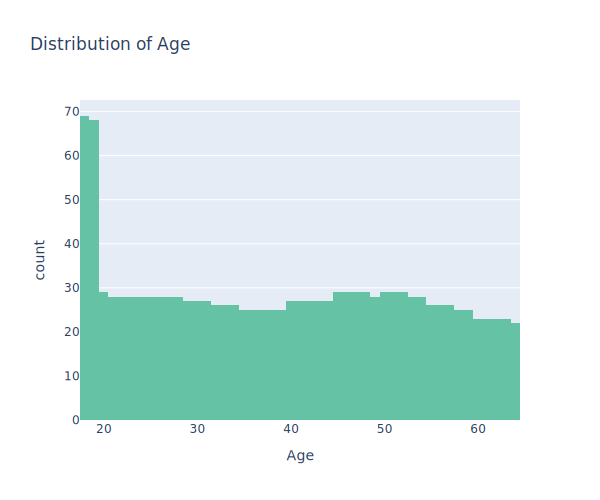

In [241]:
fig = px.histogram(med_costs, x='age', 
                   title='Distribution of Age',
                   labels={'age': 'Age', 'count': 'Count'},
                   nbins=50,
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   width=600, height=500)
fig.show('svg')

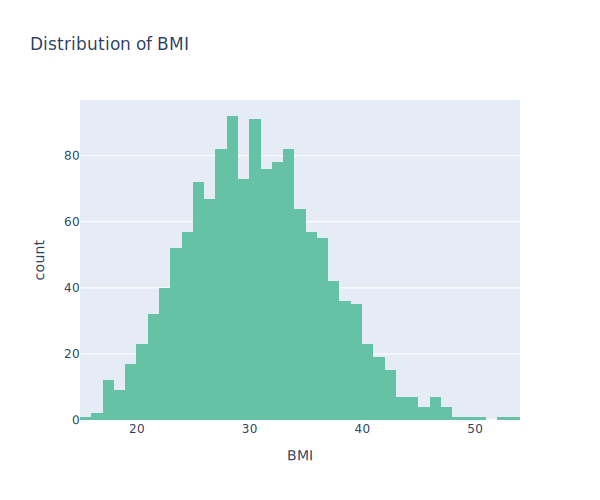

In [242]:
fig = px.histogram(med_costs, x='bmi', 
                   title='Distribution of BMI',
                   labels={'bmi': 'BMI', 'count': 'Count'},
                   nbins=50, 
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   width=600, height=500)
fig.show('svg')

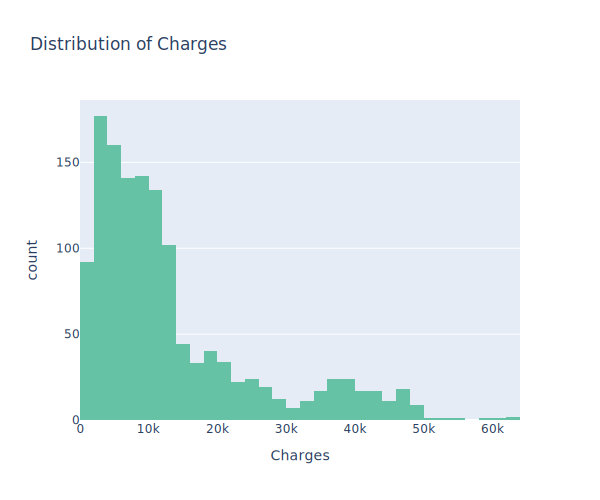

In [243]:
fig = px.histogram(med_costs, x='charges', 
                   title='Distribution of Charges',
                   labels={'charges': 'Charges', 'count': 'Count'},
                   nbins=50,
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   width=600, height=500)
fig.show('svg')

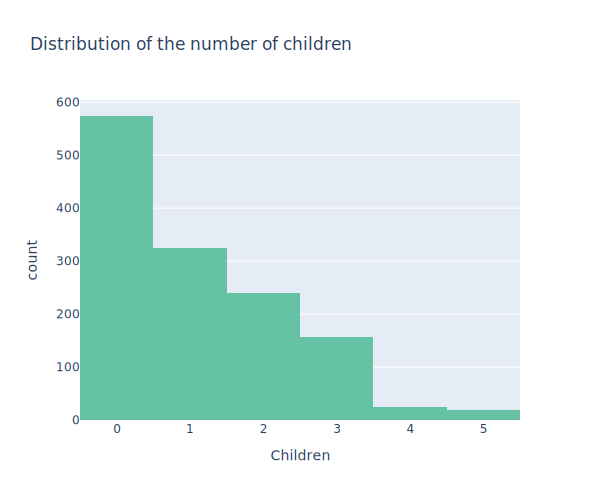

In [244]:
fig = px.histogram(med_costs, x='children', 
                   title='Distribution of the number of children',
                   labels={'children': 'Children', 'count': 'Count'},
                   nbins=10,
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   width=600, height=500)
fig.show('svg')

### - correlations

In [245]:
# Преобразование категориальных переменных в числовые
med_costs2 = med_costs.copy()
med_costs2['sex'] = med_costs2['sex'].map({'female': 0, 'male': 1})
med_costs2['smoker'] = med_costs2['smoker'].map({'no': 0, 'yes': 1})
med_costs2['region'] = med_costs2['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})
med_costs2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


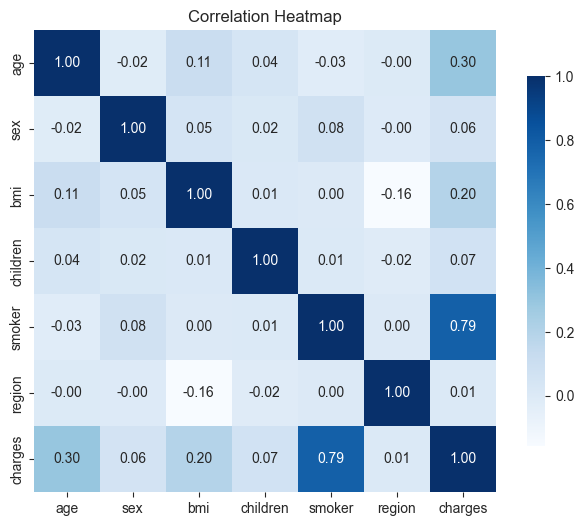

In [246]:
# Вычисление корреляции
correlation_matrix = med_costs2.corr()

# Настройка размера графика
plt.figure(figsize=(8, 6))

# Создание тепловой карты
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', square=True, cbar_kws={"shrink": .8})

# Добавление заголовка
plt.title('Correlation Heatmap')

# Отображение графика
plt.show()

Correlation heatmap shows noticeable correlation between smoker and charges variables, as well as charges and age, and charges and BMI.

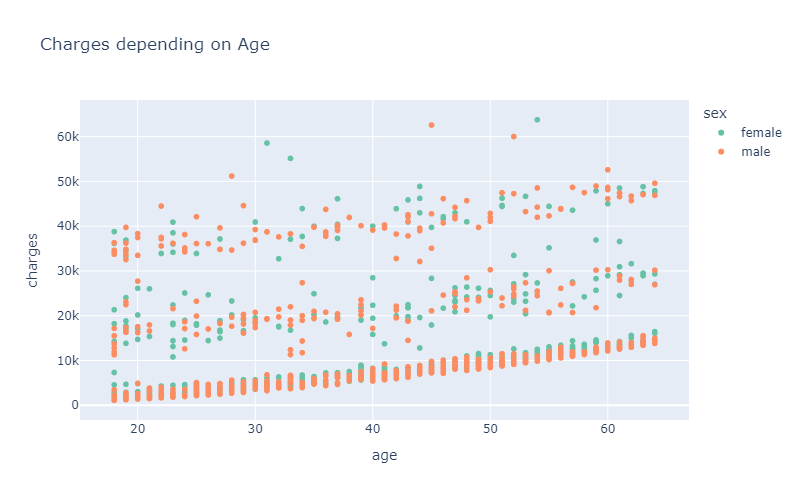

In [247]:
fig = px.scatter(med_costs, x='age', y='charges', color='sex',
                   title='Charges depending on Age',
                   labels={'children': 'Children', 'count': 'Count'},
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   width=800, height=500)
fig.show('png')

The chart above shows correlation between charges and age. The more is age, the more are insurance costs.

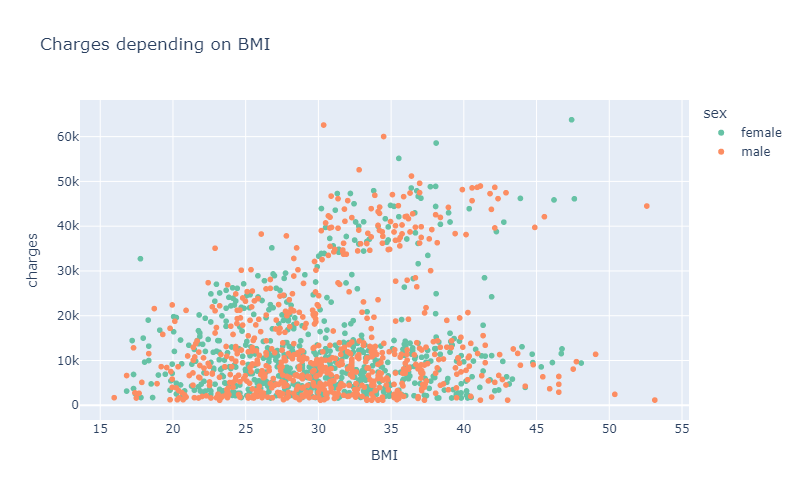

In [248]:
fig = px.scatter(med_costs, x='bmi', y='charges', color='sex',
                   title='Charges depending on BMI',
                   labels={'bmi': 'BMI', 'count': 'Count'},
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   width=800, height=500)
fig.show('png')

Scatterplot above shows that there is group of people who's BMI is more than 30 and charges are more than 30k.

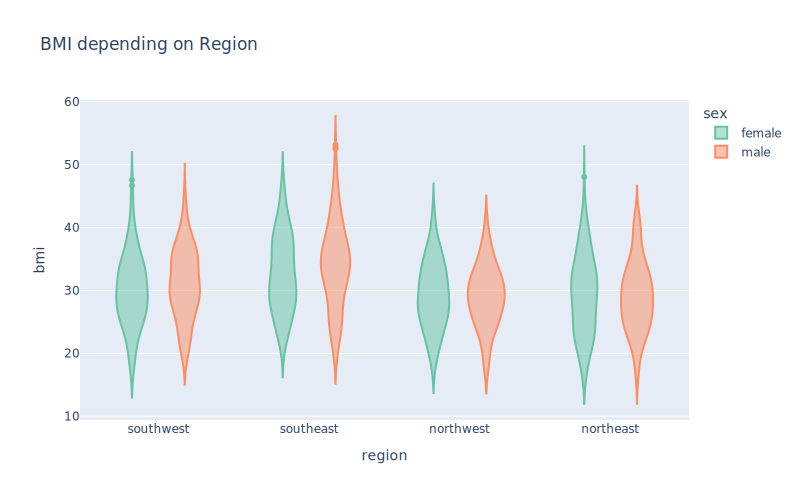

In [249]:
fig = px.violin(med_costs,x='region', y='bmi', color='sex',
                   title='BMI depending on Region',
                   labels={'children': 'Children', 'count': 'Count'},
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   width=800, height=500)
fig.show('svg')

The violin plot above demonstrates that southeast region has the highest BMI, while north regions index is lower than south.

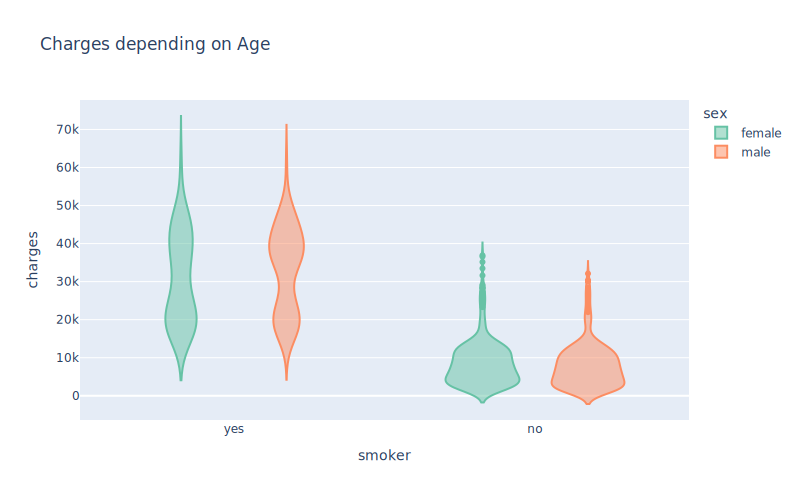

In [250]:
fig = px.violin(med_costs,x='smoker', y='charges', color='sex',
                   title='Charges depending on Age',
                   labels={'children': 'Children', 'count': 'Count'},
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   width=800, height=500)
fig.show('svg')

The biggest correlation between charges and smoker variables is demonstrated by violin plot above.  

It is clearly seen that smokers' chargers for medical insurance are much higher, especially for males smokers, which median charges are 36.1k, while female smokers have 29.0k. In non-smoker group median charges for male are 7k, while for females 7.6k.

## Conclusions

- People who smoke have more medical insurance charges, especially males.
- Females non-smokers have higher charges than males non-smokers.
- Southern regions have higher BMI, especially the southeast, while northern regions have lower BMI.
- There are more smokers in the eastern regions compared to the west.
- There is a group of people with a BMI over 30 and charges exceeding 30k, which is larger than other groups.
- Charges correlate with age: the older the person, the higher the insurance costs.